In [1]:
!pip install pdfplumber
!pip install pyvis


In [2]:
!pip install openai

In [125]:
from openai import OpenAI


client= OpenAI( api_key= '-------------',)



modeltype= 'gpt-4-turbo-preview'

filename= "./100-Papers-in-Clinical-Psychiatry-Depressive-Disorders-Comparative-efficacy-and-acceptability-of-12-new-generation-antidepressants-a-multiple-treatments-meta-analysis.pdf"
assistant_name= 'Clinicial Assistant'

instructions= """
You are a clinician who is reading through the given clinical paper related to depression, antidepressants, and treatments.
Your goal is to help real-world clinicians search and find evidence-based treatments.
"""

content= """
You are to extract important entities and their relationships between one another from this paper. Return dictionary called data that I can use to turn into a pandas dataframe.The dataframe should have headers "entity1", "relationship", "entity 2", where each row will describe the type of
relationship between the two entities. entities can be, but is not limited to, drugs, symptoms, conditions, and illnesses. 
Create as many relationships as you see evident, the following relationships have already been found manually int he article: 
"more efficacious than", "same efficacy as", "Side effect", "Recommended first-line treatment", "High Efficiency for", "Less commonly used for", "Treats", "Moderate efficacy for",
"Widely used for". 
Remember, the entities are not limited to just drugs. entities can be illnesses and conditions like 
depression, panic disorder, social anxiety, generalized anxiety disorder, PTSD, anxiety. I should find these in the relationships too along with drugs as entities, and don't just use depression. 



, """

assistant= client.beta.assistants.create(
name= assistant_name,
instructions= instructions,
model= modeltype,
tools= [{"type":"file_search"}])

message_file= client.files.create(
file=open(filename, "rb"),
purpose="assistants")

In [126]:
thread= client.beta.threads.create(
    messages=[
        {
            "role":"user",
            "content": content,
            "attachments":[
                {"file_id": message_file.id,
                "tools":[{"type":"file_search"}]}
            ],

        }
    ]
                 )

run= client.beta.threads.runs.create_and_poll(
thread_id= thread.id, assistant_id= assistant.id)

messages= list(client.beta.threads.messages.list(thread_id=thread.id, run_id= run.id))
message_content= messages[0].content[0].text
annotations= message_content.annotations
citations=[]
for index, annotation in enumerate(annotations):
             message_content.valye= message_content.value .replace(annotation.text,""). replace(".", "")
             if file_citation :=getattr(annotations, "file_citation", None):
                 cited_file= client.files.retrieve(file_citation.file.id)
                 citations.append(f"[{index}] {cited_file.filename}")
cand_name= message_content.value.replace(".", ""). strip()


In [127]:
print(cand_name)

Based on the extracted information from the paper, I've compiled relationships between various entities (antidepressants, symptoms/conditions, and efficacies) into a list that can be easily converted into a Pandas DataFrame Here are the relationships identified:

```python
data = {
    "entity1": [
        "Escitalopram", "Mirtazapine", "Sertraline", "Venlafaxine", 
        "Duloxetine", "Fluoxetine", "Fluvoxamine", "Paroxetine", "Reboxetine", 
        "Duloxetine", "Paroxetine", "Fluvoxamine", "Venlafaxine", "Reboxetine",
        "Escitalopram", "Sertraline",
    ],
    "relationship": [
        "More efficacious than", "More efficacious than", "More efficacious than", "More efficacious than", 
        "Less efficacious than", "Less efficacious than", "Less efficacious than", "Less efficacious than", "Less efficacious than", 
        "Less well tolerated than", "Less well tolerated than", "Less well tolerated than", "Less well tolerated than", "Less well tolerated than",
        "Bett

In [118]:
import pandas as pd
data = {
    'entity1': ['Escitalopram', 'Mirtazapine', 'Sertraline', 'Venlafaxine', 'Duloxetine', 'Paroxetine', 'Fluvoxamine', 'Reboxetine', 'Duloxetine', 'Paroxetine', 'Fluvoxamine', 'Citalopram', 'Escitalopram', 'Sertraline', 'Escitalopram', 'Escitalopram', 'Sertraline', 'Fluoxetine', 'Milnacipran', 'Mirtazapine', 'Paroxetine', 'Reboxetine', 'Sertraline', 'Venlafaxine', 'Venlafaxine', 'Duloxetine', 'Mirtazapine', 'Duloxetine'],
    'relationship': ['More efficacious than', 'More efficacious than', 'More efficacious than', 'More efficacious than', 'Less well tolerated than', 'Less well tolerated than', 'Less well tolerated than', 'Less well tolerated than', 'Same efficacy as', 'Same efficacy as', 'Less commonly used for', 'Less commonly used for', 'High Efficiency for', 'Less commonly used for', 'Recommended first-line treatment', 'High Efficiency for', 'Recommended first-line treatment', 'Treats', 'Treats', 'Treats', 'Treats', 'Moderate efficacy for', 'Widely used for', 'Treats', 'Treats', 'Side effect', 'Side effect', 'Side effect'],
    'entity2': ['Duloxetine', 'Fluoxetine', 'Fluvoxamine', 'Paroxetine', 'Escitalopram', 'Escitalopram', 'Citalopram', 'Many other antidepressants', 'Fluoxetine', 'Escitalopram', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Nausea', 'Weight gain', 'Drowsiness']
}
paper1= pd.DataFrame(data)
print(paper1)

paper1.entity1.unique()
paper1.entity2.unique()


print(paper1)

         entity1              relationship  \
0   Escitalopram     more efficacious than   
1    Mirtazapine     more efficacious than   
2    Venlafaxine     more efficacious than   
3     Sertraline     more efficacious than   
4     Reboxetine     less efficacious than   
5     Duloxetine  less well tolerated than   
6     Paroxetine  less well tolerated than   
7    Fluvoxamine  less well tolerated than   
8   Escitalopram    high acceptability for   
9     Sertraline         high efficacy for   
10   Venlafaxine         high efficacy for   
11    Fluoxetine          same efficacy as   
12   Mirtazapine       less often used for   
13   Venlafaxine         treats depression   
14    Reboxetine  less well tolerated than   

                                              entity2  
0   Duloxetine, Fluoxetine, Fluvoxamine, Paroxetin...  
1                                          Fluoxetine  
2                             Duloxetine, Fluvoxamine  
3     Duloxetine, Fluvoxamine, Paroxeti

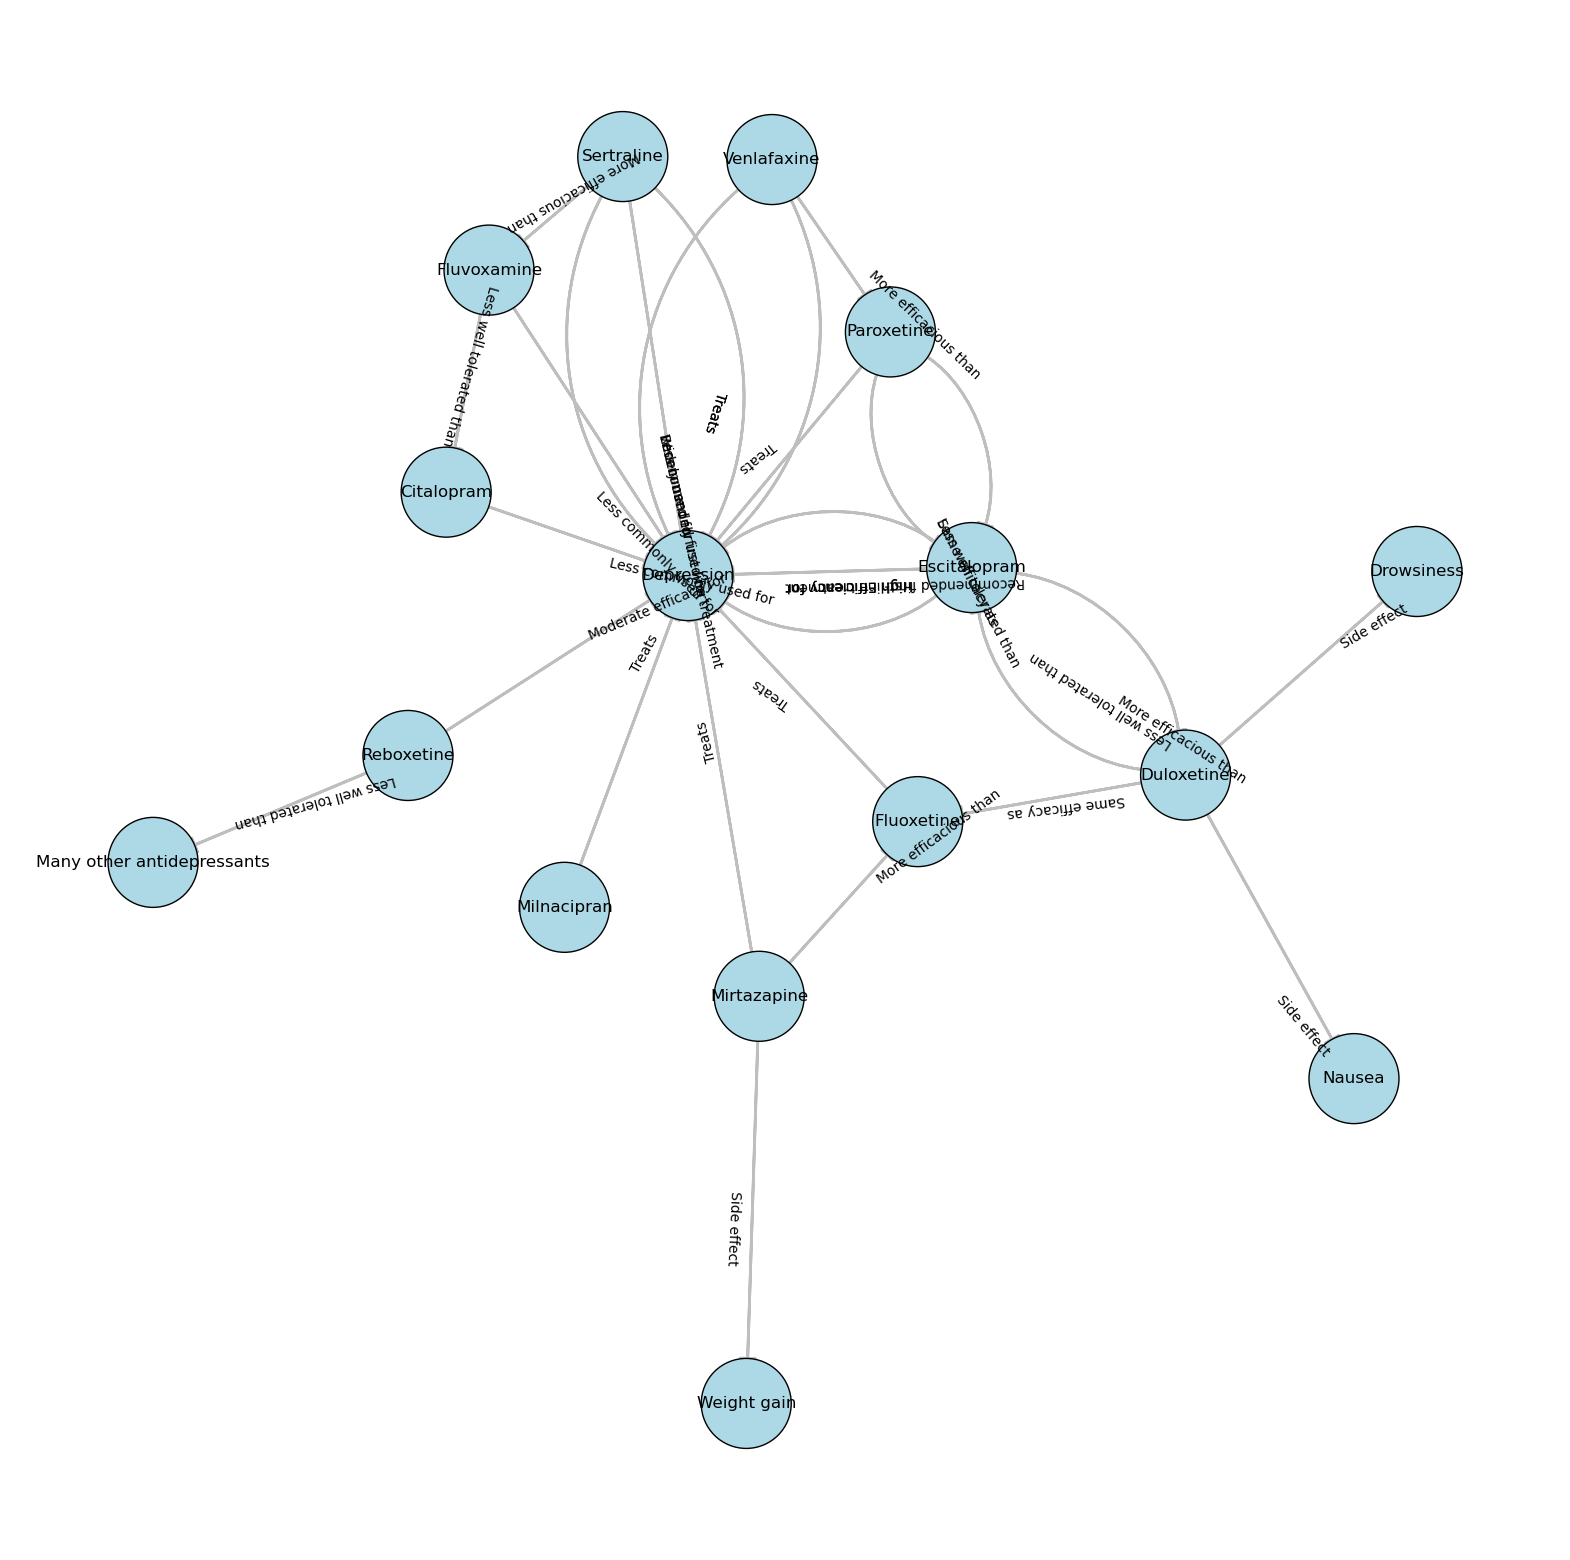

In [124]:
data = {
    'entity1': ['Escitalopram', 'Mirtazapine', 'Sertraline', 'Venlafaxine', 'Duloxetine', 'Paroxetine', 'Fluvoxamine', 'Reboxetine', 'Duloxetine', 'Paroxetine', 'Fluvoxamine', 'Citalopram', 'Escitalopram', 'Sertraline', 'Escitalopram', 'Escitalopram', 'Sertraline', 'Fluoxetine', 'Milnacipran', 'Mirtazapine', 'Paroxetine', 'Reboxetine', 'Sertraline', 'Venlafaxine', 'Venlafaxine', 'Duloxetine', 'Mirtazapine', 'Duloxetine'],
    'relationship': ['More efficacious than', 'More efficacious than', 'More efficacious than', 'More efficacious than', 'Less well tolerated than', 'Less well tolerated than', 'Less well tolerated than', 'Less well tolerated than', 'Same efficacy as', 'Same efficacy as', 'Less commonly used for', 'Less commonly used for', 'High Efficiency for', 'Less commonly used for', 'Recommended first-line treatment', 'High Efficiency for', 'Recommended first-line treatment', 'Treats', 'Treats', 'Treats', 'Treats', 'Moderate efficacy for', 'Widely used for', 'Treats', 'Treats', 'Side effect', 'Side effect', 'Side effect'],
    'entity2': ['Duloxetine', 'Fluoxetine', 'Fluvoxamine', 'Paroxetine', 'Escitalopram', 'Escitalopram', 'Citalopram', 'Many other antidepressants', 'Fluoxetine', 'Escitalopram', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Nausea', 'Weight gain', 'Drowsiness']
}
df = pd.DataFrame(data)



g = ig.Graph(directed=True)


unique_entities = pd.unique(df[['entity1', 'entity2']].values.ravel())


g.add_vertices(unique_entities)


g.add_edges(zip(df['entity1'], df['entity2']))


g.es['label'] = df['relationship'].tolist()

fig, ax = plt.subplots(figsize=(20, 20))
layout = g.layout('kk')  


visual_style = {
    "vertex_label": g.vs['name'],
    "vertex_size": 90,
    "vertex_color": 'lightblue',
    "edge_color": 'gray',
    "edge_arrow_size": 0.5,
    "layout": layout,
    "target": ax,
    "margin": 10
}

ig.plot(g, **visual_style)
import numpy as np

for i, edge in enumerate(g.es):
    start, end = edge.tuple
    label_pos = (np.array(layout[start]) + np.array(layout[end])) / 2  
    delta_x = layout[end][0] - layout[start][0]
    delta_y = layout[end][1] - layout[start][1]
    angle = np.arctan2(delta_y, delta_x)  
    angle_degrees = np.degrees(angle)  

    if abs(delta_x) > abs(delta_y):  
        label_offset_x = np.sign(delta_x) * 0.15
        label_offset_y = np.sign(delta_y) * 0.05
    else:  
        label_offset_x = np.sign(delta_x) * 0.05
        label_offset_y = np.sign(delta_y) * 0.15 
    
    label_pos[0] += label_offset_x
    label_pos[1] += label_offset_y
    

    if delta_x >= 0:  
        ha = 'left'
    else:  
        ha = 'right'

    if delta_y >= 0:
        va = 'bottom'
    else: 
        va = 'top'
    
    ax.text(label_pos[0], label_pos[1], g.es['label'][i],
            fontsize=10, color='black', ha=ha, va=va,
            rotation=angle_degrees, rotation_mode='anchor') 

plt.show()


In [2]:
import networkx as nx

G= nx.DiGraph()

for _, row in paper1.iterrows():
    drug1 = row['entity1']
    relationship = row['relationship']
    drug2 = row['entity2']

    G.add_node(drug1, type='entity1')
    G.add_node(drug2, type='entity2')


    G.add_edge(drug1, drug2, relationship=relationship)

print("Nodes:", G.nodes(data=True))
print("Edges:", G.edges(data=True))

Nodes: [('Mirtazapine', {'type': 'entity2'}), ('Fluoxetine', {'type': 'entity1'}), ('Sertraline', {'type': 'entity1'}), ('Depressive Disorders', {'type': 'entity2'}), ('Venlafaxine', {'type': 'entity1'}), ('Reboxetine', {'type': 'entity1'}), ('Major Depression', {'type': 'entity2'}), ('Escitalopram', {'type': 'entity1'}), ('Major Depressive Disorder', {'type': 'entity2'}), ('Depression', {'type': 'entity2'}), ('Nausea', {'type': 'entity2'}), ('Duloxetine', {'type': 'entity1'}), ('Anxiety', {'type': 'entity2'}), ('Fluvoxamine', {'type': 'entity1'}), ('Milnacipran', {'type': 'entity1'})]
Edges: [('Mirtazapine', 'Fluoxetine', {'relationship': 'is more effective than'}), ('Fluoxetine', 'Nausea', {'relationship': 'has side effect of'}), ('Sertraline', 'Depressive Disorders', {'relationship': 'has lower remission with'}), ('Venlafaxine', 'Mirtazapine', {'relationship': 'is used in combination with'}), ('Venlafaxine', 'Depression', {'relationship': 'is used to treat'}), ('Reboxetine', 'Major 

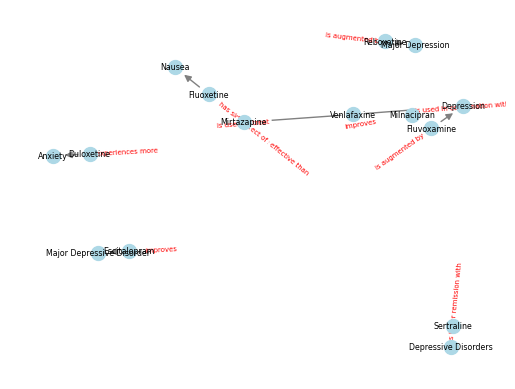

In [5]:
#Graph w/o localhost
import matplotlib.pyplot as plt
import networkx as nx

g = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos=g, node_color='lightblue', node_size=0)

nx.draw_networkx_edges(G, pos=g, edge_color='gray', arrows=True, arrowstyle='-|>', arrowsize=10)

nx.draw_networkx_labels(G, pos=g, font_size=5.7,  font_family='sans-serif')

edge_labels = {(u, v): d['relationship'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos=g, edge_labels=edge_labels, font_size=5, label_pos=2, font_color='red')

plt.axis('off')

plt.show()


In [7]:
!pip install pyvis
from pyvis.network import Network

net = Network(notebook=True, directed=True)

for node, data in G.nodes(data=True):
    net.add_node(node, label=node, title=f"Type: {data['type']}")

for source, target, data in G.edges(data=True):
    net.add_edge(source, target,  label=data.get('relationship', 'N/A'),title=data['relationship'])

net

<class 'pyvis.network.Network'> |N|=15 |E|=10

In [ ]:
!git branch main

In [ ]:
!pwd

/content


In [ ]:

!git add /content/
!git remote add origin "https://github.com/rishikasrinivas/KnowledgeGraphMentalHealth.git"
!git config --global user.email "you@example.com"
!git config --global user.name "Your Name"
!git commit -m "GPT code w/ trial kg"
!git push -u origin main

fatal: pathspec 'Brightside' did not match any files
error: remote origin already exists.
On branch master
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	KnowledgeGraphMentalHealth/

nothing added to commit but untracked files present (use "git add" to track)
fatal: could not read Username for 'https://github.com': No such device or address


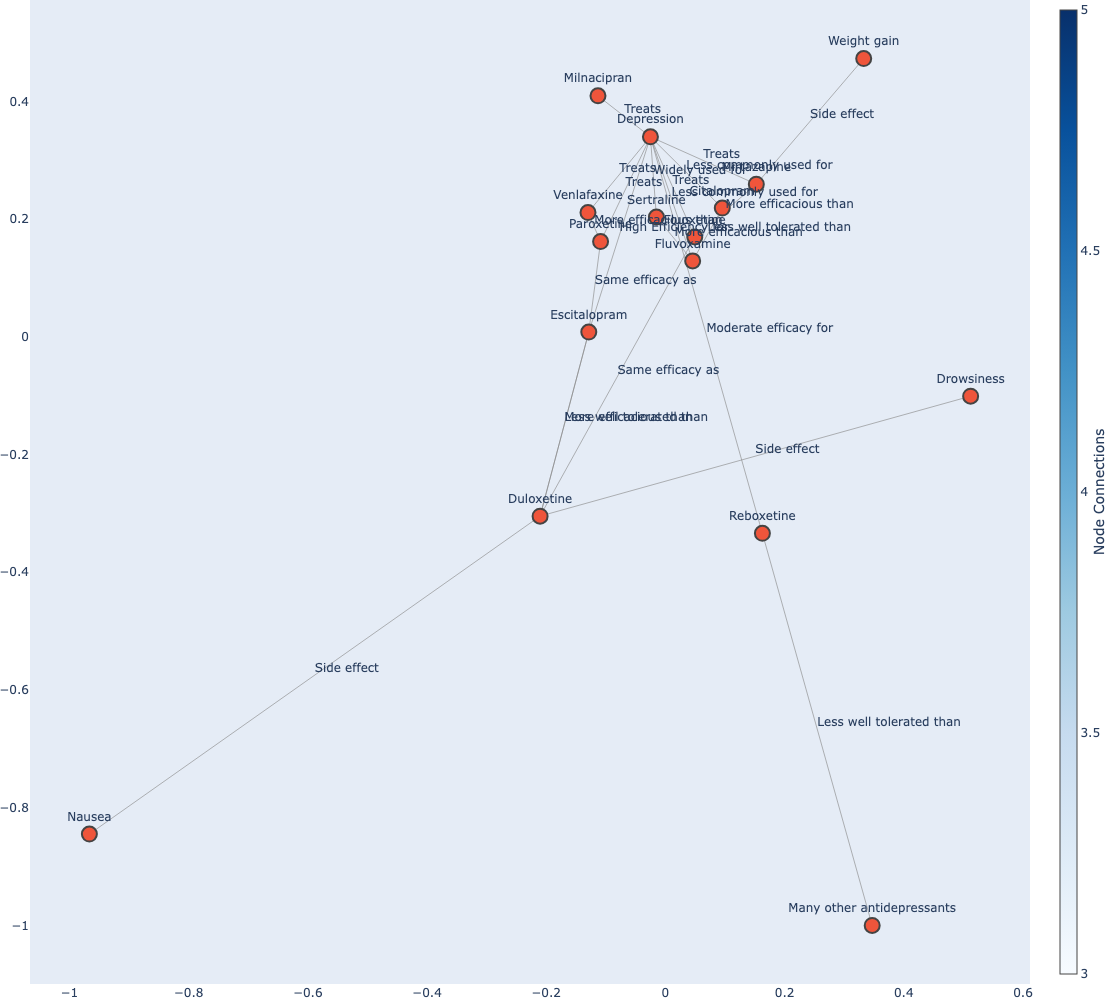

In [40]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

data = {
    'entity 1': ['Escitalopram', 'Mirtazapine', 'Sertraline', 'Venlafaxine', 'Duloxetine', 'Paroxetine', 'Fluvoxamine', 'Reboxetine', 'Duloxetine', 'Paroxetine', 'Fluvoxamine', 'Citalopram', 'Escitalopram', 'Sertraline', 'Escitalopram', 'Escitalopram', 'Sertraline', 'Fluoxetine', 'Milnacipran', 'Mirtazapine', 'Paroxetine', 'Reboxetine', 'Sertraline', 'Venlafaxine', 'Venlafaxine', 'Duloxetine', 'Mirtazapine', 'Duloxetine'],
    'relationship': ['More efficacious than', 'More efficacious than', 'More efficacious than', 'More efficacious than', 'Less well tolerated than', 'Less well tolerated than', 'Less well tolerated than', 'Less well tolerated than', 'Same efficacy as', 'Same efficacy as', 'Less commonly used for', 'Less commonly used for', 'High Efficiency for', 'Less commonly used for', 'Recommended first-line treatment', 'High Efficiency for', 'Recommended first-line treatment', 'Treats', 'Treats', 'Treats', 'Treats', 'Moderate efficacy for', 'Widely used for', 'Treats', 'Treats', 'Side effect', 'Side effect', 'Side effect'],
    'entity 2': ['Duloxetine', 'Fluoxetine', 'Fluvoxamine', 'Paroxetine', 'Escitalopram', 'Escitalopram', 'Citalopram', 'Many other antidepressants', 'Fluoxetine', 'Escitalopram', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Depression', 'Nausea', 'Weight gain', 'Drowsiness']
}

df = pd.DataFrame(data)

G = nx.from_pandas_edgelist(df, source='entity 1', target='entity 2', edge_attr='relationship', create_using=nx.DiGraph())


pos = nx.spring_layout(G)

x_nodes = [pos[node][0] for node in G.nodes()] 
y_nodes = [pos[node][1] for node in G.nodes()] 

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.635, color='#888'),
    hoverinfo='none',
    mode='lines')


node_trace = go.Scatter(
    x=x_nodes, y=y_nodes,
    mode='markers+text',
    text=[f"{node}" for node in G.nodes()],
    textposition="top center",
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='Blues',
        colorbar=dict(
            thickness=17,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        size=15,
        line_width=2))


edge_labels = [G.edges[edge]['relationship'] for edge in G.edges()]
edge_text = go.Scatter(
    x=[(pos[edge[0]][0] + pos[edge[1]][0]) / 2 for edge in G.edges()],
    y=[(pos[edge[0]][1] + pos[edge[1]][1]) / 2 for edge in G.edges()],
    text=edge_labels,
    mode='text',
    textposition="top right",
    hoverinfo='none'
)

fig = go.Figure(data=[edge_trace, node_trace, edge_text],
                layout=go.Layout(
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=0),
                    width=1500,
                    height=1000,
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)))

fig.show()

In [38]:
!pip install igraph
import pandas as pd
import igraph as ig
import matplotlib.pyplot as plt


